# Google Data Analytics Capstone: BikeShare"
### Date: August 2021

As part of the Google Data Analytics Capstone course, I had to prepare a case study. I've chosen the Cyclistic Bike Share. It's an interesting scenario with real world practice. 

## Scenario [As Given By Course]

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. 

The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. 

From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

## Ask

### Identify the business goal:

1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

My primary duty as the data analyst is to answer the first question and find the key differences between annual members and casual users. 

Once I review the data I will have a clearer idea of the potential metrics that will help answer that question. 

### Identify and consider the key stakeholders:

- Primary stakeholders are the Director of Marketing (Lily Moreno) and the Cyclistic executive team.
- Secondary stakeholders include the marketing analytics team.

## Prepare

### Data Source and Notes:

[This is a public dataset source](https://divvy-tripdata.s3.amazonaws.com/index.html). For the purpose of this case study, this data will be considered original.  The data has been made available by Motivate International Inc. under this [license](https://www.divvybikes.com/data-license-agreement).)

Reviewing the previous year (July 2020 - June 2021), there is a large amount of data. There are some inconsistences (noted below), but overall the data is reliable. 

### Tools

For this project, I have decided to use R. It can handle wrangling the large dataset, has analysis functions, and options to visualize. In addition, this would give me more experience working with R.

## Process:

I begin by installing the needed packages and libraries to make wrangling and cleaning the data easier.

In [1]:
#Loading up needed libraries
library(tidyverse)
library(janitor)
library(lubridate)
library(ggplot2)
library(scales)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




I now bring in the past year's data so I set up my working directory and upload the files. 

In [2]:
#Upload the previous 12 months of data
bike0720<-read.csv("../input/july-2020-june-2021-divvy-data/202007-divvy-tripdata.csv")
bike0820<-read.csv("../input/july-2020-june-2021-divvy-data/202008-divvy-tripdata.csv")
bike0920<-read.csv("../input/july-2020-june-2021-divvy-data/202009-divvy-tripdata.csv")
bike1020<-read.csv("../input/july-2020-june-2021-divvy-data/202010-divvy-tripdata.csv")
bike1120<-read.csv("../input/july-2020-june-2021-divvy-data/202012-divvy-tripdata.csv")
bike1220<-read.csv("../input/july-2020-june-2021-divvy-data/202012-divvy-tripdata.csv")
bike0121<-read.csv("../input/july-2020-june-2021-divvy-data/202101-divvy-tripdata.csv")
bike0221<-read.csv("../input/july-2020-june-2021-divvy-data/202102-divvy-tripdata.csv")
bike0321<-read.csv("../input/july-2020-june-2021-divvy-data/202103-divvy-tripdata.csv")
bike0421<-read.csv("../input/july-2020-june-2021-divvy-data/202104-divvy-tripdata.csv")
bike0521<-read.csv("../input/july-2020-june-2021-divvy-data/202105-divvy-tripdata.csv")
bike0621<-read.csv("../input/july-2020-june-2021-divvy-data/202106-divvy-tripdata.csv")



I review the data to see if there are any inconsistencies or errors. 

In [3]:
#Check the structure and columns of files to note inconsistencies and errors
colnames(bike0720)
colnames(bike0820)
colnames(bike0920)
colnames(bike1020)
colnames(bike1120)
colnames(bike1220)
colnames(bike0121)
colnames(bike0221)
colnames(bike0321)
colnames(bike0421)
colnames(bike0521)
colnames(bike0621)

str(bike0720)
str(bike0820)
str(bike0920)
str(bike1020)
str(bike1120)
str(bike1220)
str(bike0121)
str(bike0221)
str(bike0321)
str(bike0421)
str(bike0521)
str(bike0621)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

'data.frame':	551480 obs. of  13 variables:
 $ ride_id           : chr  "762198876D69004D" "BEC9C9FBA0D4CF1B" "D2FD8EA432C77EC1" "54AE594E20B35881" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : chr  "2020-07-09 15:22:02" "2020-07-24 23:56:30" "2020-07-08 19:49:07" "2020-07-17 19:06:42" ...
 $ ended_at          : chr  "2020-07-09 15:25:52" "2020-07-25 00:20:17" "2020-07-08 19:56:22" "2020-07-17 19:27:38" ...
 $ start_station_name: chr  "Ritchie Ct & Banks St" "Halsted St & Roscoe St" "Lake Shore Dr & Diversey Pkwy" "LaSalle St & Illinois St" ...
 $ start_station_id  : int  180 299 329 181 268 635 113 211 176 31 ...
 $ end_station_name  : chr  "Wells St & Evergreen Ave" "Broadway & Ridge Ave" "Clark St & Wellington Ave" "Clark St & Armitage Ave" ...
 $ end_station_id    : int  291 461 156 94 301 289 140 31 191 142 ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.6 -87.6 -87.6 

After looking over the structure and column names and working with the data, I noted some things that needed to be addressed.

* There were rides that had a duration of zero. These included bike inspections. They were removed.
* The Start and End Times were char, changed them to date time.

I combined the twelve files into one data frame. I also removed rows and columns with that were empty. 

In [4]:
#Combine the dataframes into one
bike_rides<-rbind(bike0720,bike0820,bike0920,bike1020,bike1120,bike1220,bike0121,bike0221,bike0321,bike0421,bike0521,bike0621)

#Clean/remove empty rows and columns
bike_rides<-janitor::remove_empty(bike_rides, which = c("cols"))
bike_rides<-janitor::remove_empty(bike_rides, which = c("rows"))

As I noted earlier, I changed the datatype for the start and end times from char to date time. I also add columns for date, month, day, and day of the week to make it easier to track rides.   

In [5]:
#Change data type from char into date
bike_rides$started_at <- lubridate::ymd_hms(bike_rides$started_at)
bike_rides$ended_at <- lubridate::ymd_hms(bike_rides$ended_at)

#Create hour field to calculate duration and busiest hours used
bike_rides$start_hour<-lubridate::hour(bike_rides$started_at)
bike_rides$end_hour<- lubridate::hour(bike_rides$ended_at)

#Add date,month, day, and year of bike rides
bike_rides$date <- as.Date(bike_rides$started_at)
bike_rides$month <- format(as.Date(bike_rides$date), "%m")
bike_rides$day <- format(as.Date(bike_rides$date), "%d")
bike_rides$year <- format(as.Date(bike_rides$date), "%Y")
bike_rides$day_of_week <- format(as.Date(bike_rides$date), "%A")

#Calculate ride duration by hour and minutes
bike_rides$ride_duration_hrs <- difftime(bike_rides$ended_at,bike_rides$started_at, units=c("hours"))
bike_rides$ride_duration_mins <- difftime(bike_rides$ended_at,bike_rides$started_at, units=c("mins"))

After reviewing the data again, I then calculate ride time (ride duration). I cleaned up the data by removing bike inspections where the duration is 0. 

In [6]:
#Review dataframe
head(bike_rides)
str(bike_rides)

#Calculate ride duration 
bike_rides$ride_duration <- difftime(bike_rides$ended_at,bike_rides$started_at)

#Make sure ride_duration is numeric
is.factor(bike_rides$ride_duration)
bike_rides$ride_duration <- as.numeric(as.character(bike_rides$ride_duration))
is.numeric(bike_rides$ride_duration)

#Remove bike inspections & create new data frame
bike_ridesv2<-bike_rides[!(bike_rides$start_station_name =="HQ QR" | bike_rides$ride_duration<=0),]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,member_casual,start_hour,end_hour,date,month,day,year,day_of_week,ride_duration_hrs,ride_duration_mins
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<chr>,<int>,<int>,<date>,<chr>,<chr>,<chr>,<chr>,<drtn>,<drtn>
1,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180,Wells St & Evergreen Ave,291,41.90687,-87.62622,⋯,member,15,15,2020-07-09,07,09,2020,Thursday,0.06388889 hours,3.833333 mins
2,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299,Broadway & Ridge Ave,461,41.94367,-87.64895,⋯,member,23,0,2020-07-24,07,24,2020,Friday,0.39638889 hours,23.783333 mins
3,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329,Clark St & Wellington Ave,156,41.93259,-87.63643,⋯,casual,19,19,2020-07-08,07,08,2020,Wednesday,0.12083333 hours,7.250000 mins
4,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181,Clark St & Armitage Ave,94,41.89076,-87.63170,⋯,casual,19,19,2020-07-17,07,17,2020,Friday,0.34888889 hours,20.933333 mins
5,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268,Clark St & Schiller St,301,41.91172,-87.62680,⋯,member,10,10,2020-07-04,07,04,2020,Saturday,0.08555556 hours,5.133333 mins
6,65636B619E24257F,docked_bike,2020-07-28 16:33:03,2020-07-28 16:49:10,Fairbanks St & Superior St,635,Wells St & Concord Ln,289,41.89575,-87.62010,⋯,casual,16,16,2020-07-28,07,28,2020,Tuesday,0.26861111 hours,16.116667 mins


'data.frame':	4332008 obs. of  22 variables:
 $ ride_id           : chr  "762198876D69004D" "BEC9C9FBA0D4CF1B" "D2FD8EA432C77EC1" "54AE594E20B35881" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct, format: "2020-07-09 15:22:02" "2020-07-24 23:56:30" ...
 $ ended_at          : POSIXct, format: "2020-07-09 15:25:52" "2020-07-25 00:20:17" ...
 $ start_station_name: chr  "Ritchie Ct & Banks St" "Halsted St & Roscoe St" "Lake Shore Dr & Diversey Pkwy" "LaSalle St & Illinois St" ...
 $ start_station_id  : chr  "180" "299" "329" "181" ...
 $ end_station_name  : chr  "Wells St & Evergreen Ave" "Broadway & Ridge Ave" "Clark St & Wellington Ave" "Clark St & Armitage Ave" ...
 $ end_station_id    : chr  "291" "461" "156" "94" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.6 -87.6 -87.6 -87.6 -87.6 ...
 $ end_lat           : num  41.9 42 41.9 41.9 41.9 ...
 $ end_lng           :

[1] FALSE

[1] TRUE

## Analyze

I began my analysis by calculating some key metrics about the bike rides - median, average, max,and mininum. 

Note: When getting the maximum ride duration, the data returned 3,356,649 minutes. Seeing that this translates to 55,000+ hours, this outlier was removed (and documented here).

I also looked into which days of the weeks rides were taken to see if there was a difference between annual members and casual users. 

In [7]:
#Bike Rides Analysis - looking at average, median, max, and min by minutes
mean(bike_ridesv2$ride_duration_mins)             
median(bike_ridesv2$ride_duration_mins)          
max(bike_ridesv2$ride_duration_mins)
min(bike_ridesv2$ride_duration_mins)

#Compare Usage By User Type
aggregate(bike_ridesv2$ride_duration_mins~bike_ridesv2$member_casual, FUN=mean)
aggregate(bike_ridesv2$ride_duration_mins~bike_ridesv2$member_casual, FUN=median)
aggregate(bike_ridesv2$ride_duration_mins~bike_ridesv2$member_casual, FUN=max)
aggregate(bike_ridesv2$ride_duration_mins~bike_ridesv2$member_casual, FUN=min)

#Breaking down and comparing average ride duration between casual and members by day of the week
aggregate(bike_ridesv2$ride_duration~bike_ridesv2$member_casual + bike_ridesv2$day_of_week,FUN=mean)

#Order this by day of week
bike_ridesv2$day_of_week<-ordered(bike_ridesv2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

#Re-run the rides to compare
aggregate(bike_ridesv2$ride_duration~bike_ridesv2$member_casual + bike_ridesv2$day_of_week,FUN=mean)

head(bike_ridesv2)
colnames(bike_ridesv2)

#More analysis - ohh goody! Breaking it down by type and weekday
bike_ridesv2 %>%
  mutate(weekday=wday(started_at, label =TRUE)) %>%                                            
  group_by(member_casual,weekday) %>%                                                         
  summarise(number_of_rides=n(),average_duration_mins = mean(ride_duration)) %>%                     
  arrange(member_casual,weekday)            

Time difference of 26.37632 mins

Time difference of 13.68333 mins

Time difference of 55944.15 mins

Time difference of 0.01666667 mins

bike_ridesv2$member_casual,bike_ridesv2$ride_duration_mins
<chr>,<drtn>
casual,41.11040 mins
member,15.15917 mins


bike_ridesv2$member_casual,bike_ridesv2$ride_duration_mins
<chr>,<drtn>
casual,19.28333 mins
member,10.80000 mins


bike_ridesv2$member_casual,bike_ridesv2$ride_duration_mins
<chr>,<drtn>
casual,55944.15 mins
member,33421.37 mins


bike_ridesv2$member_casual,bike_ridesv2$ride_duration_mins
<chr>,<drtn>
casual,0.01666667 mins
member,0.01666667 mins


bike_ridesv2$member_casual,bike_ridesv2$day_of_week,bike_ridesv2$ride_duration
<chr>,<chr>,<dbl>
casual,Friday,2364.9251
member,Friday,898.3894
casual,Monday,2397.2763
member,Monday,880.6965
casual,Saturday,2626.5091
member,Saturday,994.1986
casual,Sunday,2837.9305
member,Sunday,1030.6761
casual,Thursday,2228.8629


bike_ridesv2$member_casual,bike_ridesv2$day_of_week,bike_ridesv2$ride_duration
<chr>,<ord>,<dbl>
casual,Sunday,2837.9305
member,Sunday,1030.6761
casual,Monday,2397.2763
member,Monday,880.6965
casual,Tuesday,2176.5230
member,Tuesday,855.9670
casual,Wednesday,2225.7673
member,Wednesday,864.8341
casual,Thursday,2228.8629


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,start_hour,end_hour,date,month,day,year,day_of_week,ride_duration_hrs,ride_duration_mins,ride_duration
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<int>,<int>,<date>,<chr>,<chr>,<chr>,<ord>,<drtn>,<drtn>,<dbl>
1,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180,Wells St & Evergreen Ave,291,41.90687,-87.62622,⋯,15,15,2020-07-09,07,09,2020,Thursday,0.06388889 hours,3.833333 mins,230
2,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299,Broadway & Ridge Ave,461,41.94367,-87.64895,⋯,23,0,2020-07-24,07,24,2020,Friday,0.39638889 hours,23.783333 mins,1427
3,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329,Clark St & Wellington Ave,156,41.93259,-87.63643,⋯,19,19,2020-07-08,07,08,2020,Wednesday,0.12083333 hours,7.250000 mins,435
4,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181,Clark St & Armitage Ave,94,41.89076,-87.63170,⋯,19,19,2020-07-17,07,17,2020,Friday,0.34888889 hours,20.933333 mins,1256
5,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268,Clark St & Schiller St,301,41.91172,-87.62680,⋯,10,10,2020-07-04,07,04,2020,Saturday,0.08555556 hours,5.133333 mins,308
6,65636B619E24257F,docked_bike,2020-07-28 16:33:03,2020-07-28 16:49:10,Fairbanks St & Superior St,635,Wells St & Concord Ln,289,41.89575,-87.62010,⋯,16,16,2020-07-28,07,28,2020,Tuesday,0.26861111 hours,16.116667 mins,967


[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "start_hour"         "end_hour"          
[16] "date"               "month"              "day"               
[19] "year"               "day_of_week"        "ride_duration_hrs" 
[22] "ride_duration_mins" "ride_duration"

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



member_casual,weekday,number_of_rides,average_duration_mins
<chr>,<ord>,<int>,<dbl>
casual,Sun,355366,2837.9305
casual,Mon,201782,2397.2763
casual,Tue,199616,2176.5230
casual,Wed,211513,2225.7673
casual,Thu,206653,2228.8629
casual,Fri,270701,2364.9251
casual,Sat,422555,2626.5091
member,Sun,311887,1030.6761
member,Mon,321961,880.6965


## Share

With some analysis done, I now start with some visualizations to easily see any key differences between annual members and casual users. 

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



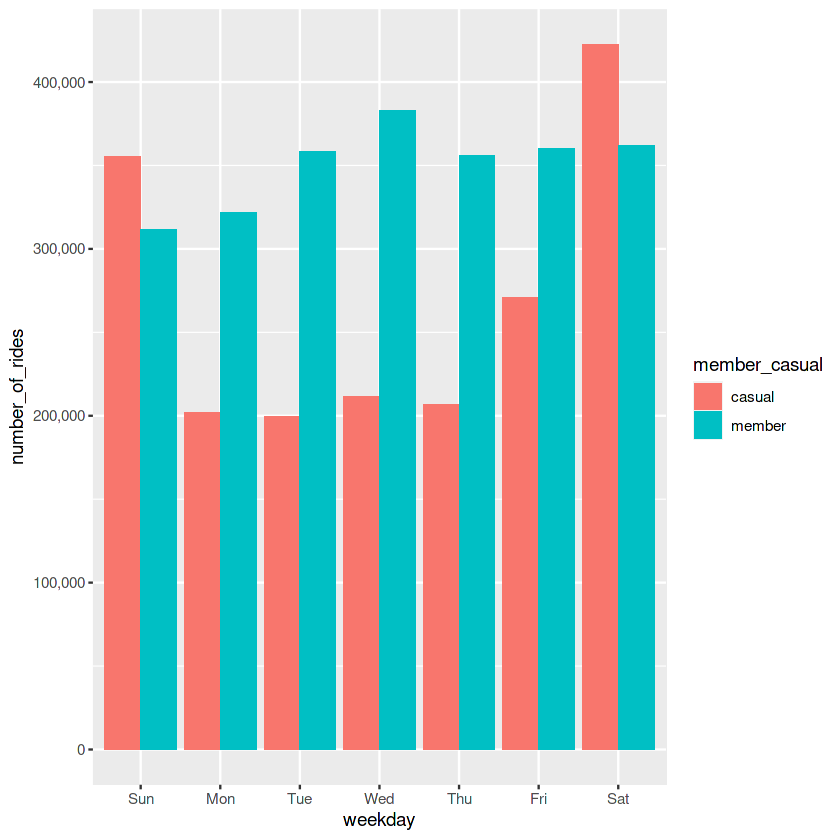

`summarise()` has grouped output by 'rideable_type'. You can override using the `.groups` argument.



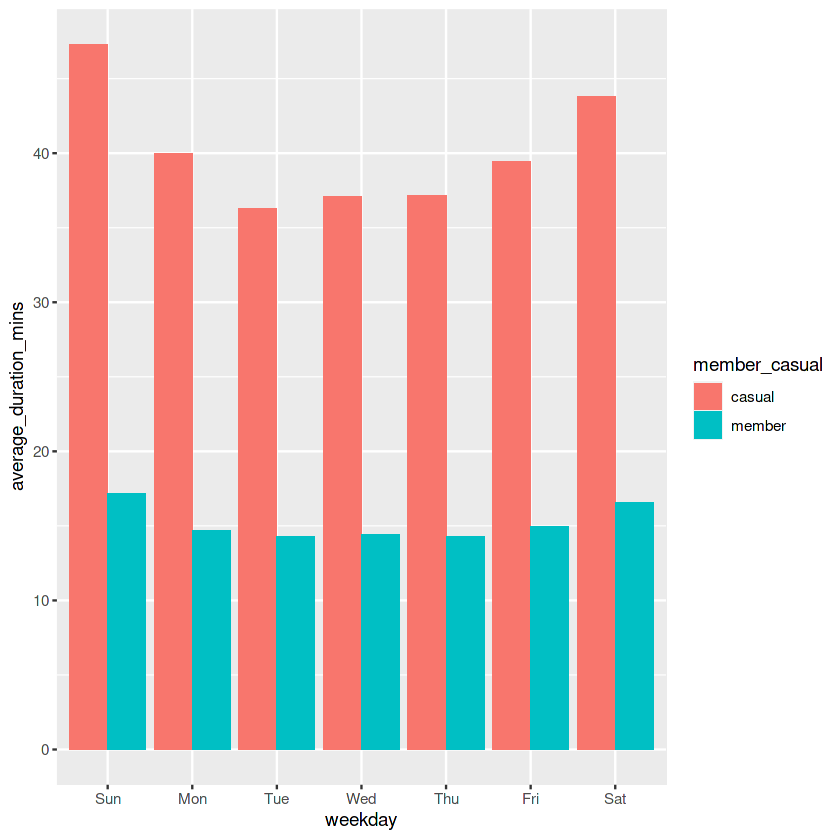

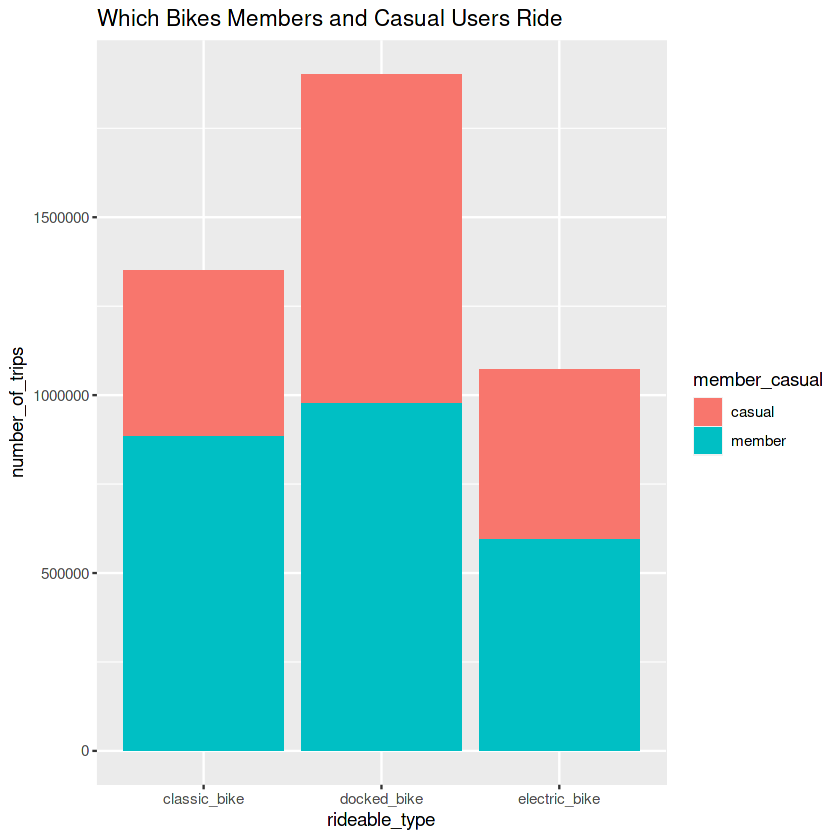

In [8]:
#Let's visualize the number of rides by rider type
bike_ridesv2 %>%
  mutate(weekday = wday(started_at, label =TRUE)) %>%
  group_by(member_casual,weekday) %>% 
  summarise(number_of_rides=n(),average_duration_mins = mean(ride_duration_mins)) %>%  
  arrange(member_casual, weekday) %>%
  ggplot(aes(x=weekday,y=number_of_rides, fill= member_casual)) + geom_col(position="dodge") + scale_y_continuous(labels = comma)

#Create visualization for average duration by minutes
bike_ridesv2 %>%
  mutate(weekday=wday(started_at, label =TRUE)) %>% 
  group_by(member_casual,weekday)%>% 
  summarise(number_of_rides=n(), average_duration_mins = mean(ride_duration_mins)) %>% 
  arrange(member_casual, weekday)  %>%      
  ggplot(aes(x=weekday,y=average_duration_mins, fill= member_casual)) + geom_col(position="dodge") + scale_y_continuous(labels = comma)

#Break data down to see which type of bike the different users ride
bike_ridesv2 %>%
  group_by(rideable_type, member_casual) %>%
  summarise(number_of_trips = n()) %>%  
  ggplot(aes(x= rideable_type, y=number_of_trips, fill= member_casual))+
  geom_bar(stat='identity') +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) +
  labs(title ="Which Bikes Members and Casual Users Ride") 

## Key Findings

Looking at the data, here are some key takeaways gathered:
* Casual users tend to ride during weekends while annual members bike mainly during the week. 
* Annual members ride less (duration) than casual riders. (This could be mean they use thier bikes to commute to work)

## Recommendations

Based on the data, my recommendations are: 
* Run a small A/B campaign for the top three stations used by casual users and annual users offering annual membership discounts. Expand based on results. 
* To test whether annual members are commuters, offer discounts for employers near the most popular bike stations for current members. 